# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Read the dataset to the python environment.

In [132]:
data=pd.read_excel('iris.xls')

In [133]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
data.shape

(150, 5)

In [135]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [137]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

# 2.Do necessary pre-processing steps

Handling missing values and outliers

In [138]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [139]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [140]:
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [141]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Box plot of SL')

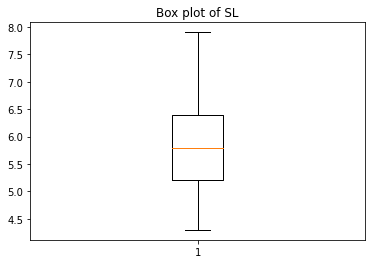

In [142]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of SW')

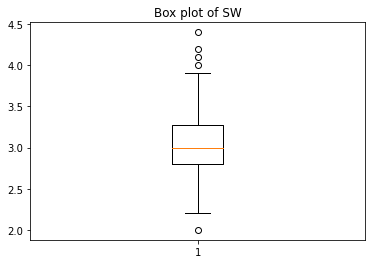

In [143]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [144]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [145]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [146]:
IQR=Q3-Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR

In [147]:
print(lowlim)
print(uplim)

2.1249999999999996
3.9250000000000003


In [148]:
Outlier=[]
for x in data['SW']:
    if((x>uplim)or(x<lowlim)):
        Outlier.append(x)

In [149]:
Outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [150]:
ind1=data['SW']>uplim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [151]:
ind2=data['SW']<lowlim
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [152]:
data.drop([14, 15, 32, 33],inplace=True)

In [153]:
data.drop([60],inplace=True)

Text(0.5, 1.0, 'Box plot of SW')

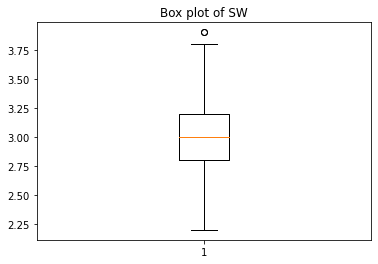

In [154]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Text(0.5, 1.0, 'Box plot of PL')

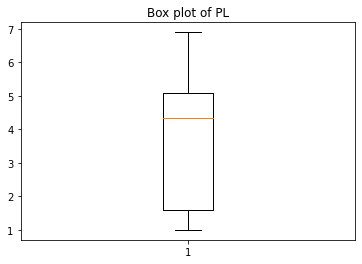

In [155]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

Text(0.5, 1.0, 'Box plot of PW')

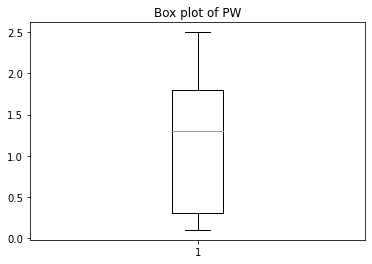

In [156]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

# 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [157]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

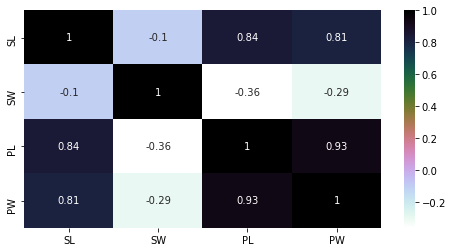

In [158]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')  
plt.show()

In [159]:
#Splitting The Data into Training And Testing Dataset

In [160]:
train,test = train_test_split(data, test_size=0.3)

In [161]:
X_train= train[['SL','SW','PL','PW']] # taking the training data features
y_train= train.Classification # output of the training data

X_test= test[['SL','SW','PL','PW']] # taking test data feature
y_test= test.Classification # output value of the test data

In [162]:
X_train.head()

,SL,SW,PL,PW
109,7.2,3.6,4.35,2.5
89,5.5,2.5,4.00,1.3
142,5.8,2.7,5.10,1.9
37,4.9,3.1,1.50,0.1
124,6.7,3.0,5.70,2.1


In [163]:
X_test.head()

,SL,SW,PL,PW
139,6.9,3.1,5.4,2.1
114,5.8,2.8,5.1,2.4
1,4.9,3.0,1.4,0.2
51,5.8,3.2,4.5,1.5
138,6.0,3.0,4.8,1.8


In [164]:
y_train.head()

109     Iris-virginica
89     Iris-versicolor
142     Iris-virginica
37         Iris-setosa
124     Iris-virginica
Name: Classification, dtype: object

In [165]:
#SVM

In [167]:
model = svm.SVC() 

# we train the algorithm with training data and training output
model.fit(X_train,y_train)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(X_test)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, y_test)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9772727272727273


In [168]:
#Logistic Regression

In [169]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction,y_test))

The accuracy of Logistic Regression is:  0.9772727272727273


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [170]:
#Decision Tree

In [171]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Decision Tree is:  0.9545454545454546


In [172]:
#kNN

In [173]:
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction,y_test))

The accuracy of KNN is:  0.9772727272727273


SVM,Logistic Regression and kNN gave the best results for prediction

In [179]:
#Building model using Random Forest

In [206]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [213]:
from sklearn.model_selection import train_test_split
X=data[['SL', 'SW', 'PL', 'PW']]
y=data['Classification']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [214]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [215]:
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9318181818181818


In [219]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [220]:
rft=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42,criterion='entropy')

In [221]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [223]:
y_pred=rft.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.910204991087344

# SVM,Logistic Regression and kNN gave the best results for prediction with an accuracy of about 97.72%.Model building using Random Forest method has also been carried out.